This is an exercise from the YouTube Video [angGraph Complete Course for Beginners – Third exercise](https://youtu.be/jGg_1h0qzaM?t=3251)

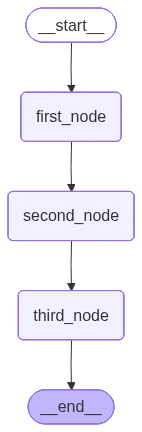

In [ ]:
from typing import TypedDict

from IPython.display import Image, display
from langgraph.graph import END, START, StateGraph


# Define the state schema
class State(TypedDict):
    name: str
    surname: str
    skills: list[str]
    result: str 


def first_node(state: State) -> State:
    state["result"] = f"Your first name is {state['name']}"
    return state


def second_node(state: State) -> State:
    state["result"] = state["result"] + f", Your surname is {state['surname']}"
    return state


def third_node(state: State) -> State:
    state["result"] = state["result"] + f", Your skills are {', '.join(state['skills'])}"
    return state


graph = StateGraph(State)
graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)
graph.add_node("third_node", third_node)
graph.add_edge(START, "first_node")
graph.add_edge("first_node", "second_node")
graph.add_edge("second_node", "third_node")
graph.add_edge("third_node", END)

workflow = graph.compile()
display(Image(workflow.get_graph().draw_mermaid_png()))

In [13]:
result = workflow.invoke(
	{"name": "Alice", "surname": "Smith", "skills": ["Python", "Machine Learning"]}
)
print(result["result"])

Your first name is Alice, Your surname is Smith, Your skills are Python, Machine Learning
